# Safaera Ataque de Tiburón

### Escaleta

In [22]:
def escaleta():
    '''
    1. #dimensiones de la tabla
    2. #solo hay dos !00% numéricas
    3. #100% numéricas: año y original order
    4. #espacio que ocupa
    5. #Edición de Encabezados de columnas, estandarizadas en minúscula y sin espacios
    6. #Contar casos unicos y frecuencia
    7. #Manejo de valores nulos
    8. # Eliminar las filas con valores NaN en la columna "country"
    '''
    return None

help(escaleta)

Help on function escaleta in module __main__:

escaleta()
    1. #dimensiones de la tabla
    2. #solo hay dos !00% numéricas
    3. #100% numéricas: año y original order
    4. #espacio que ocupa
    5. #Edición de Encabezados de columnas, estandarizadas en minúscula y sin espacios
    6. #Contar casos unicos y frecuencia
    7. #Manejo de valores nulos
    8. # Eliminar las filas con valores NaN en la columna "country"



## Importación de Librerías

In [2]:
%pip install ipython
%pip install pandas
%pip install seaborn
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import pylab as plt   
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')   # para quitar esos prints

# Exploración de archivo .csv

In [4]:
attacks = pd.read_csv('./data/attacks_2.csv', encoding='latin-1')
attacks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


###### dimensiones de la tabla

dim_original = attacks.shape

attacks.shape

In [5]:
#solo hay dos !00% numéricas
attacks._get_numeric_data().shape

(25723, 2)

In [6]:
#100% numéricas: año y original order

attacks.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [7]:
#espacio que ocupa
attacks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [8]:
#Edición de Encabezados de columnas, estandarizadas en minúscula, sin espacios

attacks.columns = [e.lower().replace(' ', '_').replace(':', '').replace('.', '_') for e in attacks.columns]

attacks.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number_1', 'case_number_2', 'original_order', 'unnamed_22',
       'unnamed_23'],
      dtype='object')

In [9]:
attacks.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number_1', 'case_number_2', 'original_order', 'unnamed_22',
       'unnamed_23'],
      dtype='object')

In [10]:
#Contar casos unicos y frecuencia

attacks.describe(include='object').T

,count,unique,top,freq
case_number,8702,6287,0,2400
date,6302,5433,1957,11
type,6298,8,Unprovoked,4595
country,6252,212,USA,2229
area,5847,825,Florida,1037
location,5762,4108,"New Smyrna Beach, Volusia County",163
activity,5758,1532,Surfing,971
name,6092,5230,male,550
sex_,5737,6,M,5094
age,3471,157,17,154


In [11]:
#estadística con numéricos

attacks.describe().T.style.format('{:.5f}')

,count,mean,std,min,25%,50%,75%,max
year,6300.00000,1927.27238,281.11631,0.00000,1942.00000,1977.00000,2005.00000,2018.00000
original_order,6309.00000,3155.99968,1821.39621,2.00000,1579.00000,3156.00000,4733.00000,6310.00000


## Manejo de valores nulos

In [12]:
# Contar valores nulos

nan_cols = attacks.isna().sum()

nan_cols[nan_cols>0]

case_number               17021
date                      19421
year                      19423
type                      19425
country                   19471
area                      19876
location                  19961
activity                  19965
name                      19631
sex_                      19986
age                       22252
injury                    19449
fatal_(y/n)               19960
time                      22775
species_                  22259
investigator_or_source    19438
pdf                       19421
href_formula              19422
href                      19421
case_number_1             19421
case_number_2             19421
original_order            19414
unnamed_22                25722
unnamed_23                25721
dtype: int64

In [13]:
attacks.isna().head()

,case_number,date,year,type,country,area,location,activity,name,sex_,...,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


## Eliminar las filas con valores NaN en la columna "country"

In [44]:
df_sharks = pd.DataFrame({
    'country': ['A', 'B', np.nan, 'D'],
    
        'value': [1, 2, 3, np.nan]
})

# Eliminar las filas con valores NaN en la columna "country"
df_sharks = attacks.dropna(subset=['country'])
df_sharks.head()

,case_number,date,year,type,country,area,location,activity,name,sex_,...,species_,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [17]:
df_sharks.describe(include='object').T

,count,unique,top,freq
case_number,6251,6235,2005.04.06,2
date,6252,5395,1957,11
type,6248,8,Unprovoked,4562
country,6252,212,USA,2229
area,5832,815,Florida,1037
location,5751,4099,"New Smyrna Beach, Volusia County",163
activity,5715,1513,Surfing,970
name,6046,5196,male,542
sex_,5691,6,M,5052
age,3462,157,17,154


In [20]:
nan_cols = df_sharks.isna().sum()

nan_cols[nan_cols>0]

case_number                  1
year                         2
type                         4
area                       420
location                   501
activity                   537
name                       206
sex_                       561
age                       2790
injury                      26
fatal_(y/n)                534
time                      3311
species_                  2800
investigator_or_source      17
href_formula                 1
unnamed_22                6251
unnamed_23                6250
dtype: int64

In [24]:
df_sharks.shape

(6252, 24)

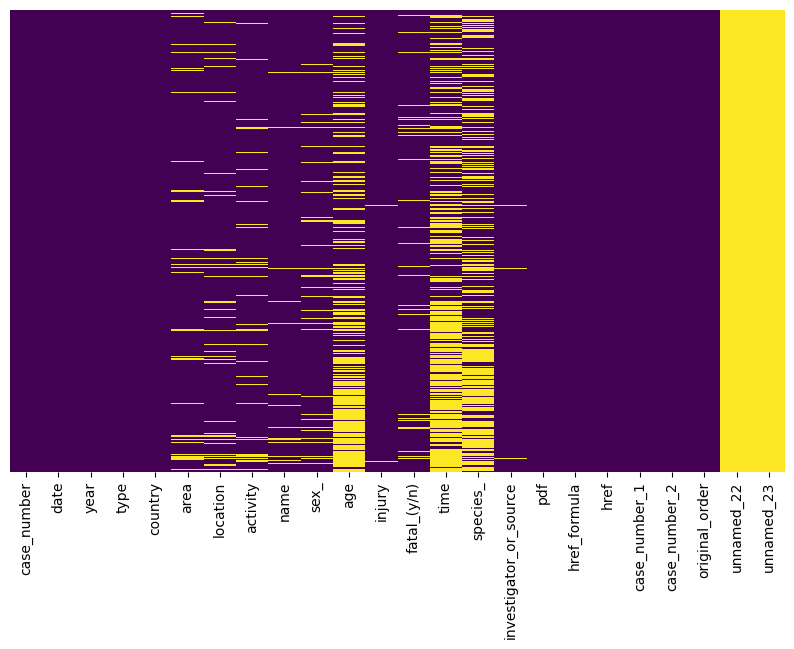

In [39]:
plt.figure(figsize=(10, 6))  # inicia la figura y establece el tamaño

sns.heatmap(df_sharks.isna(),      # datos
            yticklabels=False,  # quita las etiquetas del eje y
            cmap='viridis',     # mapa de color
            cbar=False,         # sin barra lateral
           )


plt.show();

In [25]:
df_sharks = pd.DataFrame({
    'time': ['123', 'abc123', 'A!@#1B2c', 'xyz']
})

# Eliminar todo lo que no sea número en la columna "columna1"
df['time'] = df['time'].replace(to_replace=r'\D', value='', regex=True)

print(df)

In [40]:
df_sharks['time']

0               18h00
1       14h00  -15h00
2               07h45
3                 NaN
4                 NaN
            ...      
6297              NaN
6298              NaN
6299              NaN
6300              NaN
6301              NaN
Name: time, Length: 6252, dtype: object

In [ ]:
lst_letras[]
for e df_sharks['time']:
    if c is 